In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uniprot
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import cluster

In [2]:
seqids, fastas = uniprot.read_fasta(r"C:\Users\marcu\Natural Language Processing\Final_Project\uniprot_sprot.fasta\uniprot_sprot.fasta")

In [3]:
#Could not get sequence representations/embeddings so Daniel ran model to get embeddings I could use 
sequence_representations = pd.read_csv(r"C:\Users\marcu\Natural Language Processing\Final_Project\NLPProject\human_protein_embeddings.csv",
                  index_col=0, header = 0)

In [4]:
#This is what our dataframe object looks like
sequence_representations[:3]

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
sp|Q8N6V4,0.050149,0.172451,-0.039146,0.026116,-0.160959,-0.005341,-0.006818,-0.084379,-0.131632,0.005529,...,0.096741,-0.036897,-0.069921,0.099656,-1.096404,-0.009240,0.115076,-0.077325,0.071415,0.192451
sp|Q14978,-0.140546,0.313837,0.041582,0.124503,-0.116749,-0.123953,0.002801,-0.045748,0.188941,-0.042136,...,0.102197,-0.037297,-0.057347,-0.050786,-1.090041,0.176141,0.011145,-0.106122,-0.221629,0.047661
sp|Q9UBB4,0.029336,0.223630,0.150859,0.000302,-0.025511,-0.074207,-0.022962,-0.021391,-0.159312,-0.082955,...,0.285566,0.007455,-0.097772,-0.032173,-0.432025,-0.001513,0.046353,0.037625,-0.108119,0.015362


In [5]:
#Want to get a list of the biochemical properties for each sequence 
#Each element corresponds to a row/sequence embedding: list[0] = row[0] 
biochemProps = []
for seqid in sequence_representations.index:
    seqIdx = seqids.index(seqid)
    x = fastas[seqids[seqIdx]]['sequence']
    analysis = ProteinAnalysis(x)
    biochemProps.append(analysis)

In [6]:
#Dimensions of our embeddings 
sequence_representations.shape

(879, 1280)

In [7]:
#Using scikit learn's PCA function for dimensionality reduction
pca = PCA(n_components=2)
srPCA = pca.fit_transform(sequence_representations)

Text(0.5, 0, 'Amino Acids')

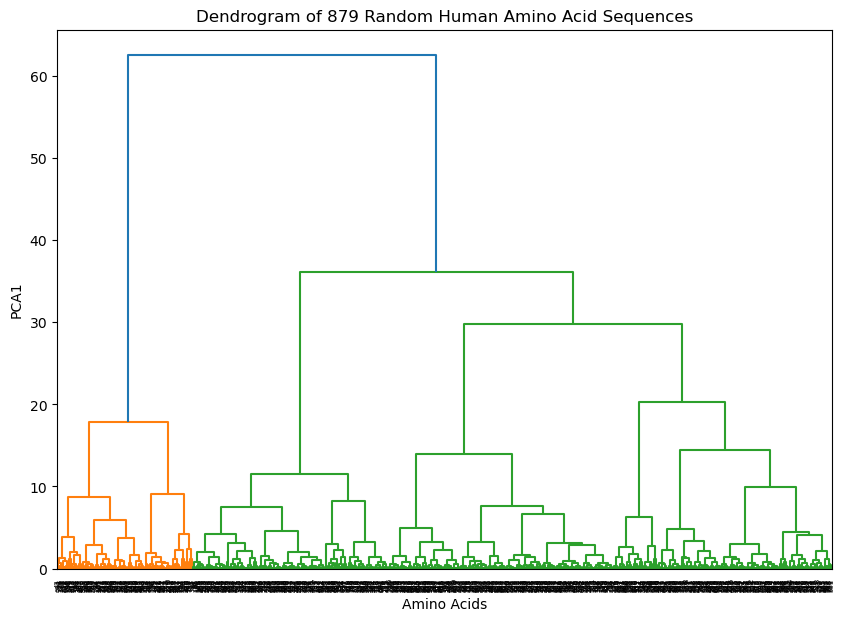

In [8]:
#Creating dendrogram using Ward linkage method 
plt.figure(figsize =(10,7))
plt.title('Dendrogram of 879 Random Human Amino Acid Sequences')

linkage_method = linkage(srPCA, method ='ward')
Dendrogram = dendrogram(linkage_method)
plt.ylabel('PCA1')
plt.xlabel('Amino Acids')

In [9]:
#n is the number of clusters we want 
n = 2

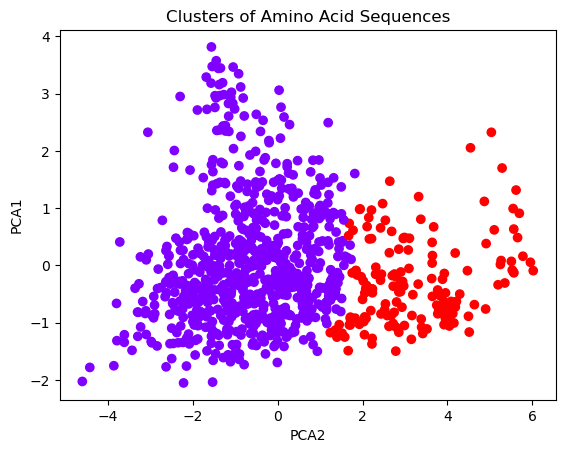

In [10]:
#Creating our clusters 
agglomerativeClusters = AgglomerativeClustering(n_clusters=n, linkage='ward')
 
#Ploting our clusters
fig, ax = plt.subplots()
scatter = ax.scatter(srPCA[:,0], srPCA[:,1], c = agglomerativeClusters.fit_predict(srPCA), cmap='rainbow')
plt.ylabel('PCA1')
plt.xlabel('PCA2')
plt.title('Clusters of Amino Acid Sequences')
plt.show()

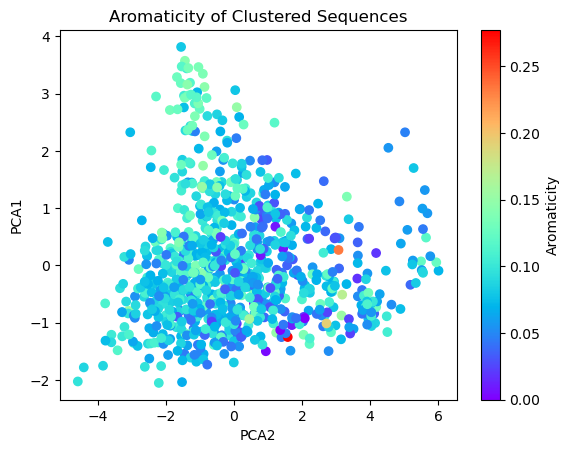

In [11]:
#Ploting same cluster plot but with respect to aromaticity 
aromaticity = [e.aromaticity() for e in biochemProps]
plt.scatter(srPCA[:,0], srPCA[:,1], c = aromaticity, cmap='rainbow')
plt.ylabel('PCA1')
plt.xlabel('PCA2')
plt.title('Aromaticity of Clustered Sequences')
cbar = plt.colorbar()
cbar.set_label('Aromaticity')
plt.show()

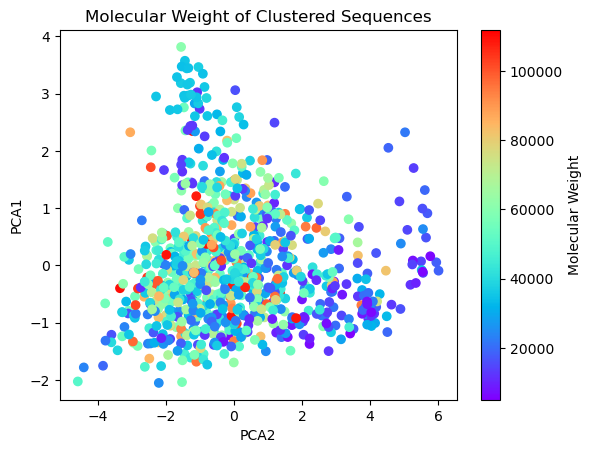

In [12]:
#Ploting same cluster plot but with respect to molecular weight 
molecular_weight = [e.molecular_weight() for e in biochemProps]
plt.scatter(srPCA[:,0], srPCA[:,1], c = molecular_weight, cmap='rainbow')
plt.ylabel('PCA1')
plt.xlabel('PCA2')
plt.title('Molecular Weight of Clustered Sequences')
cbar = plt.colorbar()
cbar.set_label('Molecular Weight')
plt.show()

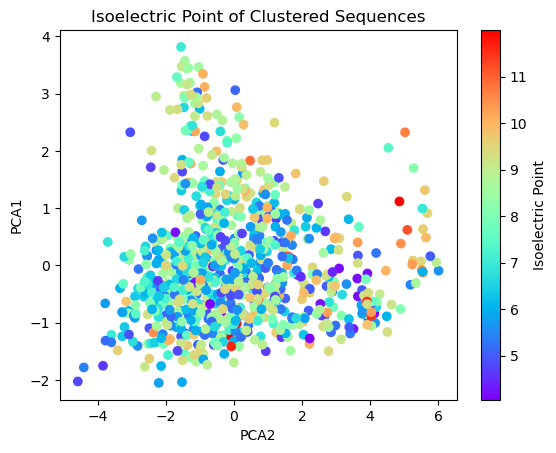

In [13]:
#Plotting same cluster plot but with respect to isoelectric point 
isoelectric_point = [e.isoelectric_point() for e in biochemProps]
plt.scatter(srPCA[:,0], srPCA[:,1], c = isoelectric_point, cmap='rainbow')
plt.ylabel('PCA1')
plt.xlabel('PCA2')
plt.title('Isoelectric Point of Clustered Sequences')
cbar = plt.colorbar()
cbar.set_label('Isoelectric Point')
plt.show()